In [18]:
# 推測統計のためのライブラリ、データ準備
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%precision 3
%matplotlib inline

In [19]:
df = pd.read_csv('/Users/yuya/Desktop/Python_Static/python_stat_sample/data/ch4_scores400.csv')
scores = np.array(df['点数'])
scores[:10]

array([76, 55, 80, 80, 74, 61, 81, 76, 23, 80])

In [20]:
# 無作為抽出を行う(Numpy)
# 復元抽出(抽出に重複を許す)
np.random.choice([1, 2, 3], 3)

array([1, 3, 3])

In [21]:
# 無作為抽出を行う(Numpy)
# 非復元抽出(抽出に重複を許さない)
np.random.choice([1, 2, 3], 3, replace=False)

array([1, 2, 3])

In [22]:
# 乱数シードを利用する
np.random.seed(0)
np.random.choice([1, 2, 3], 3)

array([1, 2, 1])

In [23]:
# Aさんの行った無作為抽出を再現する
np.random.seed(0)
sample = np.random.choice(scores, 20)
sample.mean()

70.4

In [24]:
# 母平均
scores.mean()

69.53

In [17]:
for i in range(5):
    sample = np.random.choice(scores, 20)
    print(f'{i+1}回目の無作為抽出で得た標本平均', sample.mean())

1回目の無作為抽出で得た標本平均 72.45
2回目の無作為抽出で得た標本平均 63.7
3回目の無作為抽出で得た標本平均 66.05
4回目の無作為抽出で得た標本平均 71.7
5回目の無作為抽出で得た標本平均 74.15


In [25]:
# いかさまサイの確率分布を求める
dice = [1, 2, 3, 4, 5, 6]
prob = [1/21, 2/21, 3/21, 4/21, 5/21, 6/21]

In [31]:
# 試行を行う(1回)
np.random.choice(dice, p=prob)

1

In [32]:
# 試行を行う(100回)
num_trial = 100
sample = np.random.choice(dice, num_trial, p=prob)
sample

array([6, 6, 6, 6, 6, 4, 6, 2, 5, 3, 6, 5, 4, 3, 6, 4, 5, 1, 5, 5, 5, 6,
       5, 4, 4, 5, 2, 5, 5, 3, 2, 4, 4, 5, 4, 6, 2, 3, 3, 5, 3, 4, 3, 3,
       2, 5, 2, 3, 4, 6, 2, 6, 2, 6, 4, 6, 5, 6, 1, 3, 2, 4, 2, 4, 4, 2,
       5, 5, 3, 5, 2, 5, 6, 4, 5, 2, 6, 4, 3, 5, 1, 6, 1, 5, 3, 6, 6, 3,
       5, 5, 5, 3, 6, 4, 6, 5, 4, 6, 4, 6])

In [38]:
# 度数分布表を作成する
freq, _  = np.histogram(sample, bins=6, range=(1, 7))
pd.DataFrame({'度数': freq, '相対度数':freq / num_trial},
            index = pd.Index(np.arange(1, 7), name='出目'))

,度数,相対度数
出目,,
1,4,0.04
2,13,0.13
3,15,0.15
4,19,0.19
5,25,0.25
6,24,0.24


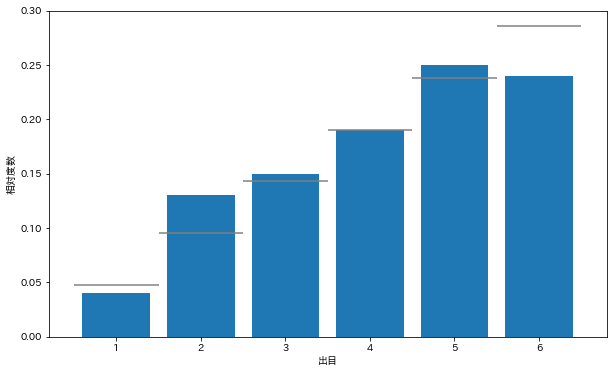

In [39]:
# 実際の確率分布とヒストグラムを図示する(100回試行)
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.hist(sample, bins=6, range=(1, 7), density=True, rwidth=0.8)
#真の確率分布を横線で表示
ax.hlines(prob, np.arange(1, 7), np.arange(2, 8), colors='gray')
# 棒グラフの[1.5, 2.5, ...., 6.5]に目盛りをつける
ax.set_xticks(np.linspace(1.5, 6.5, 6))
# 目盛りの値は[1, 2, 3, 4, 5, 6]
ax.set_xticklabels(np.arange(1, 7))
ax.set_xlabel('出目')
ax.set_ylabel('相対度数')
plt.show()

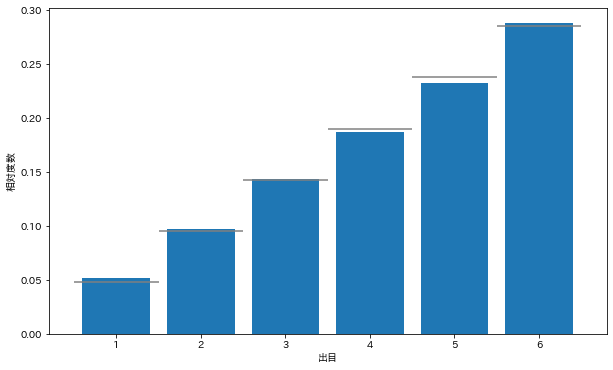

In [45]:
# 実際の確率分布とヒストグラムを図示する(10000回試行)
num_trial = 10000
sample = np.random.choice(dice, size=num_trial, p=prob)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.hist(sample, bins=6, range=(1, 7), density=True, rwidth=0.8)
#真の確率分布を横線で表示
ax.hlines(prob, np.arange(1, 7), np.arange(2, 8), colors='gray')
# 棒グラフの[1.5, 2.5, ...., 6.5]に目盛りをつける
ax.set_xticks(np.linspace(1.5, 6.5, 6))
# 目盛りの値は[1, 2, 3, 4, 5, 6]
ax.set_xticklabels(np.arange(1, 7))
ax.set_xlabel('出目')
ax.set_ylabel('相対度数')
plt.show()